# Price Prediction for cars

In [1]:
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In [2]:
car_data = pd.read_csv('data/car_data/data.csv')

In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


🔍 naming of columns inconsistant

In [4]:
car_data.columns = car_data.columns.str.lower().str.replace(' ','_')

In [5]:
car_data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

🔍 string values are also inconsistant when it comes to style  
🔍 we have columns with string values and columns with number columns

In [6]:
string_cols = list(car_data.dtypes[car_data.dtypes == 'object'].index) # here the object is a string
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for string_col in string_cols:
    car_data[string_col] = car_data[string_col].str.lower().str.replace(' ','_')

In [8]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Data exploration

In [9]:
for col in car_data.columns:
    print(col)
    print(f'number of unique values: {car_data[col].nunique()}')
    print(f'top five unique values: {car_data[col].unique()[:5]}')
    print()

make
number of unique values: 48
top five unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
number of unique values: 914
top five unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

year
number of unique values: 28
top five unique values: [2011 2012 2013 1992 1993]

engine_fuel_type
number of unique values: 10
top five unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
number of unique values: 356
top five unique values: [335. 300. 230. 320. 172.]

engine_cylinders
number of unique values: 9
top five unique values: [ 6.  4.  5.  8. 12.]

transmission_type
number of unique values: 5
top five unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
number of unique values: 4
top five unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
number of unique val

🔍 There are `nan` values for the number of car doors (and potentially elsewhere)

### Distribution of price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

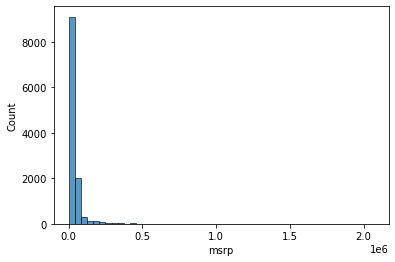

In [11]:
sns.histplot(car_data.msrp, bins=50)

1e6 == 10^6 ie 1 Million

🔍 very few cars are very expensive, the majority are at the lower end. We therefore have a long tail distribution for car price.

Let's zoom in by restricting the price range we look at

<AxesSubplot:xlabel='msrp', ylabel='Count'>

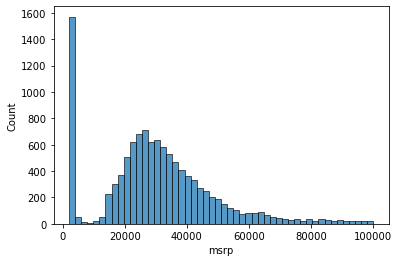

In [12]:
sns.histplot(car_data[car_data['msrp'] < 100000].msrp, bins=50)

In [13]:
# 1p adds one to all the values. We do this because logorithm of 0 doesn't exist.
np.log1p([0, 1, 10, 100, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052, 11.51293546])

❓ Not sure I fully understood why we add one here, though I can see that no values are at 0

In [14]:
price_logs = np.log1p(car_data.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

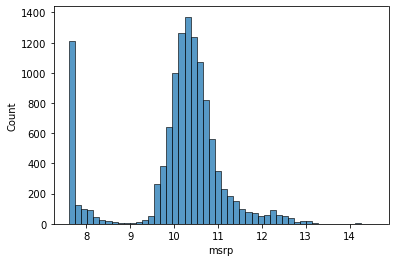

In [15]:
sns.histplot(price_logs, bins=50)

🔍 tail is now gone. The shape now also resembles the bell curve of normal distribution

In [16]:
car_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

🔍 For `engine_fuel_type`, `engine_hp`, `engine_cyclinders`, `number_of_doors` or `market_category` there are `nan` values

## 2.4 Setting up the validation framework

In [17]:
# split data into test, train and validate sub sets
n = len(car_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
assert n_val + n_test + n_train == n

In [19]:
np.random.seed(2) # ensures the notebook will be reproducible

# we have to shuffel first to try ensure that the three data sub sets are more representative
idx = np.arange(n)
np.random.shuffle(idx)

In [20]:
df_train = car_data.iloc[idx[:n_train]]
df_val = car_data.iloc[idx[n_train:n_train+n_val]]
df_test = car_data.iloc[idx[n_train+n_val:]]

In [21]:
# create x datasets
X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

In [22]:
# create y datasets from taking only the msrp values
y_train = np.log1p(X_train.msrp.values)
y_val = np.log1p(X_val.msrp.values)
y_test = np.log1p(X_test.msrp.values)

In [23]:
# remove the msrp values from the x datasets
del X_train['msrp']
del X_val['msrp']
del X_test['msrp']

In [24]:
X_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [25]:
y_train[:5]

array([ 9.57574708,  9.887663  ,  9.89323518,  7.60140233, 10.93775686])

## 2.5 Linear regression

one car and it's predicted price:  
g(xi) ≈ yi

xi = (xi1, xi2, .... xin)

g(xi) = w0 + w2xi1 + w3xi2 + ... wmXin

*where w is the weight for each feature, n the number of features and m the number of weights*

In [26]:
xi = X_train.iloc[10]

In [27]:
# for this example we will pick the following features
xi = xi[['engine_hp', 'city_mpg', 'popularity']]

In [28]:
# our weights, set by looking at what each feature denotes
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [29]:
def g(xi):
    '''
    takes a feature set and returns a prediction using linear regression
    '''
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [30]:
# we need to do exponent because before we ran log1p
predicted_price = np.expm1(g(xi))
print(f'predicted price (MSRP) is {predicted_price:.2f}')

predicted price (MSRP) is 222347.22


## 2.6 Linear Regression: Vector Form